In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
results = pd.read_parquet("C:\\Users\Omkaar Sampigeadi\Downloads\Pandas Tutorial\\results.parquet")

bios = pd.read_csv("C:\\Users\Omkaar Sampigeadi\Downloads\Pandas Tutorial\\bios.csv")

In [110]:
coffee= pd.read_csv("https://raw.githubusercontent.com/KeithGalli/complete-pandas-tutorial/refs/heads/master/warmup-data/coffee.csv")

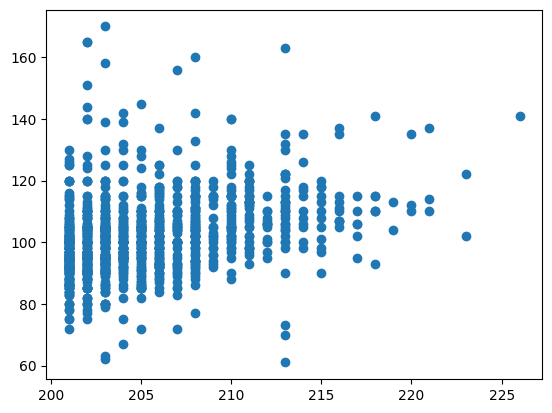

In [74]:
filtered= bios.loc[(bios["height_cm"]>200)]
plt.scatter(filtered["height_cm"],filtered["weight_kg"])

In [14]:
olympics_data = pd.read_excel("C:\\Users\Omkaar Sampigeadi\Downloads\Pandas Tutorial\olympics-data.xlsx", sheet_name=None)

In [59]:
bios.query('born_country == "CHN" and height_cm > 215').sort_values("weight_kg", ascending=True)

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
130461,133148,Zhou Qi,1996-01-16,Xinxiang,Henan,CHN,People's Republic of China,217.0,95.0,NaN
120266,122147,Zhang Zhaoxu,1987-11-18,Binzhou,Shandong,CHN,People's Republic of China,221.0,110.0,NaN
130460,133147,Li Muhao,1992-06-02,Guiyang,Guizhou,CHN,People's Republic of China,218.0,115.0,NaN
89070,89782,Yao Ming,1980-09-12,Xuhui District,Shanghai,CHN,People's Republic of China,226.0,141.0,NaN


In [76]:
bios_new = bios.copy()

In [81]:
bios_new['first_name'] = bios_new["name"].str.split(" ").str[0]
bios_new['birth_year']=bios_new["born_date"].str.split('-').str[0]

In [82]:
bios_new.query('birth_year == "1979"')

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,first_name,birth_year
247,248,Mia Audina,1979-08-22,Jakarta,Daerah Khusus Ibukota Jakarta,INA,Indonesia Netherlands,163.0,67.0,NaN,,1979
389,390,Yang Jianping,1979-12-10,Taiyuan,Shanxi,CHN,People's Republic of China,171.0,75.0,NaN,Yang,1979
685,688,Volha Barabanshchykava,1979-11-02,Minsk,Minsk,BLR,Belarus,176.0,60.0,NaN,Volha,1979
727,731,Petra Cada,1979-02-02,Praha (Prague),Hlavní město Praha,CZE,Canada,181.0,79.0,NaN,Petra,1979
1386,1393,Elba Lebrón,1979-03-04,NaN,NaN,NaN,Puerto Rico,NaN,NaN,NaN,Elba,1979
...,...,...,...,...,...,...,...,...,...,...,...,...
137843,141222,Yuri Mansur,1979-05-24,São Paulo,São Paulo,BRA,Brazil,179.0,67.0,NaN,Yuri,1979
137960,141342,Stephanie Barrett,1979-01-26,Newmarket,Ontario,CAN,Canada,NaN,NaN,NaN,Stephanie,1979
140312,143818,Javad Foroughi,1979-09-11,Dehloran,Ilam,IRI,Islamic Republic of Iran,NaN,NaN,NaN,Javad,1979
140469,143979,Shlomo Lipetz,1979-02-11,Tel Aviv,Tel Aviv,ISR,Israel,195.0,NaN,NaN,Shlomo,1979


In [85]:
nocs = pd.read_csv("https://raw.githubusercontent.com/KeithGalli/complete-pandas-tutorial/refs/heads/master/data/noc_regions.csv")

In [87]:
bios_merge = pd.merge(bios, nocs, left_on="born_country", right_on="NOC", how="left")

In [94]:
bios_merge.rename({'region':'born_country_full'}, axis=1, inplace=True)

In [107]:
bios_merge[bios_merge["born_country_full"]!=bios_merge["NOC_x"]][["name","NOC_x", "born_country_full"]]

,name,NOC_x,born_country_full
4,Albert Canet,France,UK
12,J. Defert,France,NaN
13,Étienne Durand,France,NaN
16,Guy Forget,France,Morocco
27,"Guy, Baron Lejeune",France,NaN
...,...,...,...
145491,Matthew Wepke,Jamaica,NaN
145493,Landysh Falyakhova,ROC,Russia
145495,Polina Luchnikova,ROC,Russia
145496,Valeriya Merkusheva,ROC,Russia


In [118]:
coffee.dropna(inplace=True)
coffee

,Day,Coffee Type,Units Sold
2,Tuesday,Espresso,30.0
3,Tuesday,Latte,20.0
4,Wednesday,Espresso,35.0
5,Wednesday,Latte,25.0
6,Thursday,Espresso,40.0
7,Thursday,Latte,30.0
8,Friday,Espresso,45.0
9,Friday,Latte,35.0
10,Saturday,Espresso,45.0
11,Saturday,Latte,35.0


In [134]:
bios.groupby(["born_country"]).agg({"height_cm":"mean", "weight_kg":"mean"})

,height_cm,weight_kg
born_country,,
AFG,170.416667,68.521739
AGU,186.000000,78.000000
ALB,174.657895,76.027778
ALG,176.489362,68.043796
AND,172.096774,67.451613
...,...,...
VIN,181.200000,70.600000
Vienna,171.000000,70.666667
YEM,169.000000,55.250000


In [136]:
bios.query('born_country=="GBR")

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25
37,38,Helen Aitchison,1881-12-06,Sunderland,England,GBR,Great Britain,NaN,NaN,1947-05-26
38,39,Geraldine Beamish,1883-06-23,Forest Gate,England,GBR,Great Britain,NaN,NaN,1972-05-10
39,40,Dora Boothby,1881-08-02,Finchley,England,GBR,Great Britain,NaN,NaN,1970-02-22
40,41,Julie Bradbury,1967-02-12,Oxford,England,GBR,Great Britain,175.0,64.0,NaN
...,...,...,...,...,...,...,...,...,...,...
144811,148512,Benjamin Alexander,1983-05-08,London,England,GBR,Jamaica,NaN,NaN,NaN
144815,148517,Ashley Watson,1993-10-28,Peterborough,England,GBR,Jamaica,NaN,NaN,NaN
145005,148716,Peder Kongshaug,2001-08-13,Wimbledon,England,GBR,Norway,184.0,86.0,NaN
145319,149041,Axel Brown,1992-04-02,Harrogate,England,GBR,Trinidad and Tobago,NaN,NaN,NaN
